# Readme
I analyzed Sanger sequences of HIV infected patients in Kazakhstan. The data was collected from the Republican Center for the Prevention and Control of AIDS. The samples were collected between 2017-2020. The notebook achieves the task of aligning sequences with subtype A6 along with mapping number of patients in each region of Kazakhstan. This information is useful to derive further actionable recommendations for health officials. This work showcased common work that I did in bioscience. This notebook uses a local MUSCLE program. It can be downloaded from https://github.com/rcedgar/muscle/releases/tag/5.1.0.

# Import fasta file

In [56]:
# import modules
# common
import pandas as pd
import matplotlib.pyplot as plt
import copy

# biopython
from Bio import SeqIO
from Bio import Seq

# geography and vizualization
import folium
from geopy.geocoders import Nominatim

In [1]:
# Import data from excel and visualize
file_name = "1004 patient data codes.xlsx"

df_data = pd.read_excel(file_name, sheet_name=0)
df_data.head()

,Ali's group labelling system,Unnamed: 1,Sequences,Subtype (REGA),Greater than,Unnamed: 5,Unnamed: 6,Greaterthan,Country,yearHIV+,Region,Patient#,Gender,RiskFactors(LosAlamos),Collectiondate
0,>CRF02_AG.KZ.2009.ALM.01.M.PI.2017,1,TGYACTGARAGACAGGCTAATTTTTTAGGGAAAATTTGGCCTTCCA...,CRF02_AG,>,NaN,NaN,>,KZ,2009,ALM,1,M,PI,2017
1,>A6.KZ.2012.PAV.02.M.PI.2017,2,ACTGARAGACAGGCTAATTTTTTAGGGAGAATTTGGCCTTCCAGCA...,A6,>,NaN,NaN,>,KZ,2012,PAV,2,M,PI,2017
2,>CRF02_AG.KZ.2013.JAM.03.F.NR.2017,3,GYACTGARAGACAGGCTAATTTTTTAGGGAGGATTTGGCCTTCCAG...,CRF02_AG,>,NaN,NaN,>,KZ,2013,JAM,3,F,NR,2017
3,>CRF02_AG.KZ.2007.TUR.04.F.NR.2017,4,TGYACTGARAGACAGGCTAATTTTTTAGGGAGAATCTGGCCTTCCA...,CRF02_AG,>,NaN,NaN,>,KZ,2007,TUR,4,F,NR,2017
4,>CRF02_AG.KZ.2008.TUR.05.F.NR.2017,5,TGYACTGARAGACAGGCTAATTTTTTAGGGAAACTTTGGCCTTCCG...,CRF02_AG,>,NaN,NaN,>,KZ,2008,TUR,5,F,NR,2017


In [2]:
# leave only important columns
columns_save = ["Ali's group labelling system", "Sequences"]

# rename columns
df_save = df_data[columns_save]
df_save = df_save.rename(columns={"Ali's group labelling system": "label", "Sequences": "sequence"})

In [3]:
# detect null values
df_save.isnull().sum()

label       0
sequence    0
dtype: int64

In [4]:
# rewrite labels without spaces
clean_labels = []
clean_sequences = []

for label in df_save["label"]:
    clean_labels.append(label.replace(" ", ""))
    
for sequence in df_save["sequence"]:
    clean_sequences.append(sequence.replace(" ", ""))

df_save["label"] = clean_labels
df_save["sequence"] = clean_sequences

In [5]:
# visualize data
df_save

,label,sequence
0,>CRF02_AG.KZ.2009.ALM.01.M.PI.2017,TGYACTGARAGACAGGCTAATTTTTTAGGGAAAATTTGGCCTTCCA...
1,>A6.KZ.2012.PAV.02.M.PI.2017,ACTGARAGACAGGCTAATTTTTTAGGGAGAATTTGGCCTTCCAGCA...
2,>CRF02_AG.KZ.2013.JAM.03.F.NR.2017,GYACTGARAGACAGGCTAATTTTTTAGGGAGGATTTGGCCTTCCAG...
3,>CRF02_AG.KZ.2007.TUR.04.F.NR.2017,TGYACTGARAGACAGGCTAATTTTTTAGGGAGAATCTGGCCTTCCA...
4,>CRF02_AG.KZ.2008.TUR.05.F.NR.2017,TGYACTGARAGACAGGCTAATTTTTTAGGGAAACTTTGGCCTTCCG...
...,...,...
999,>CRF02_AG.KZ.2011.KAR.1000.F.PI.2019,TGYACTGAGAGACAGGCTAATTTTTTAGGGAAAATTTGGCCTTCCA...
1000,>A6.KZ.2013.KAR.1001.F.PI.2019,AAAGAGTGYACTGAGAGACAGGCTAATTTTTTAGGGAGAATTTGGC...
1001,>CRF02_AG.KZ.2006.ALM.1002.F.PI.2019,AATGAAAGAGTGYACTGAGAGACAGGCTAATTTTTTAGGGAAAATT...
1002,>CRF02_AG.KZ.2017.ALM.1003.F.NR.2019,TGYACTGAGAGACAGGCTAATTTTTTAGGGAAAATTTGGCCTTCCA...


In [6]:
# save data to csv
df_save.to_csv("patients_1004_sequences.csv", header=True, index=False)

# Exploratory analysis for sequences

## Composition of sequences

In [7]:
# composition of nucleotides
nucleotides = {"A": 0, "T": 0, "C": 0, "G": 0, "others": 0}

others_nd = ["R", "Y", "D", "W", "M", "K", "S", "H", "V", "N", "B"]

# loop through nucleotides
for single_seq in df_save["sequence"]:
    
    for nt in single_seq:
        if nt == "A":
            nucleotides["A"] += 1
        elif nt == "T":
            nucleotides["T"] += 1
        elif nt == "C":
            nucleotides["C"] += 1
        elif nt == "G":
            nucleotides["G"] += 1
        elif nt in others_nd:
            nucleotides["others"] += 1
        else:
            print(f"nucleotide is written as {nt}, or as space")

nucleotide is written as \, or as space


In [8]:
# visualize amount of nucleotides
nucleotides

{'A': 461168, 'T': 279855, 'C': 210784, 'G': 260746, 'others': 11988}

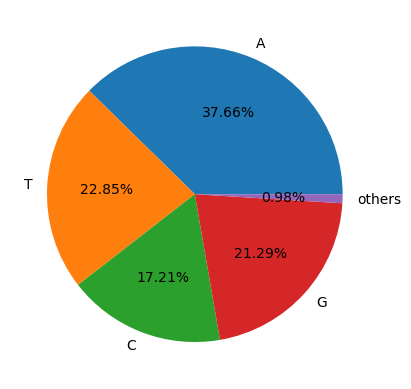

In [9]:
# Define the data
pie_sizes = []
pie_labels = []

for key in nucleotides.keys():
    pie_sizes.append(nucleotides[key])
    pie_labels.append(key)

# Create the pie chart
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.2f%%')

# Show the chart
plt.show()

## Sequences length

In [10]:
# sequences length
len_sequences = []

for i in range( len(df_save) ):
    len_sequences.append(len(df_save['sequence'][i]))

In [11]:
# min, max, mean
print(f"Min length is {min(len_sequences)}")
print(f"Max length is {max(len_sequences)}")
print(f"Mean length is {sum(len_sequences) / len(len_sequences)}")

Min length is 664
Max length is 1490
Mean length is 1219.6633466135459


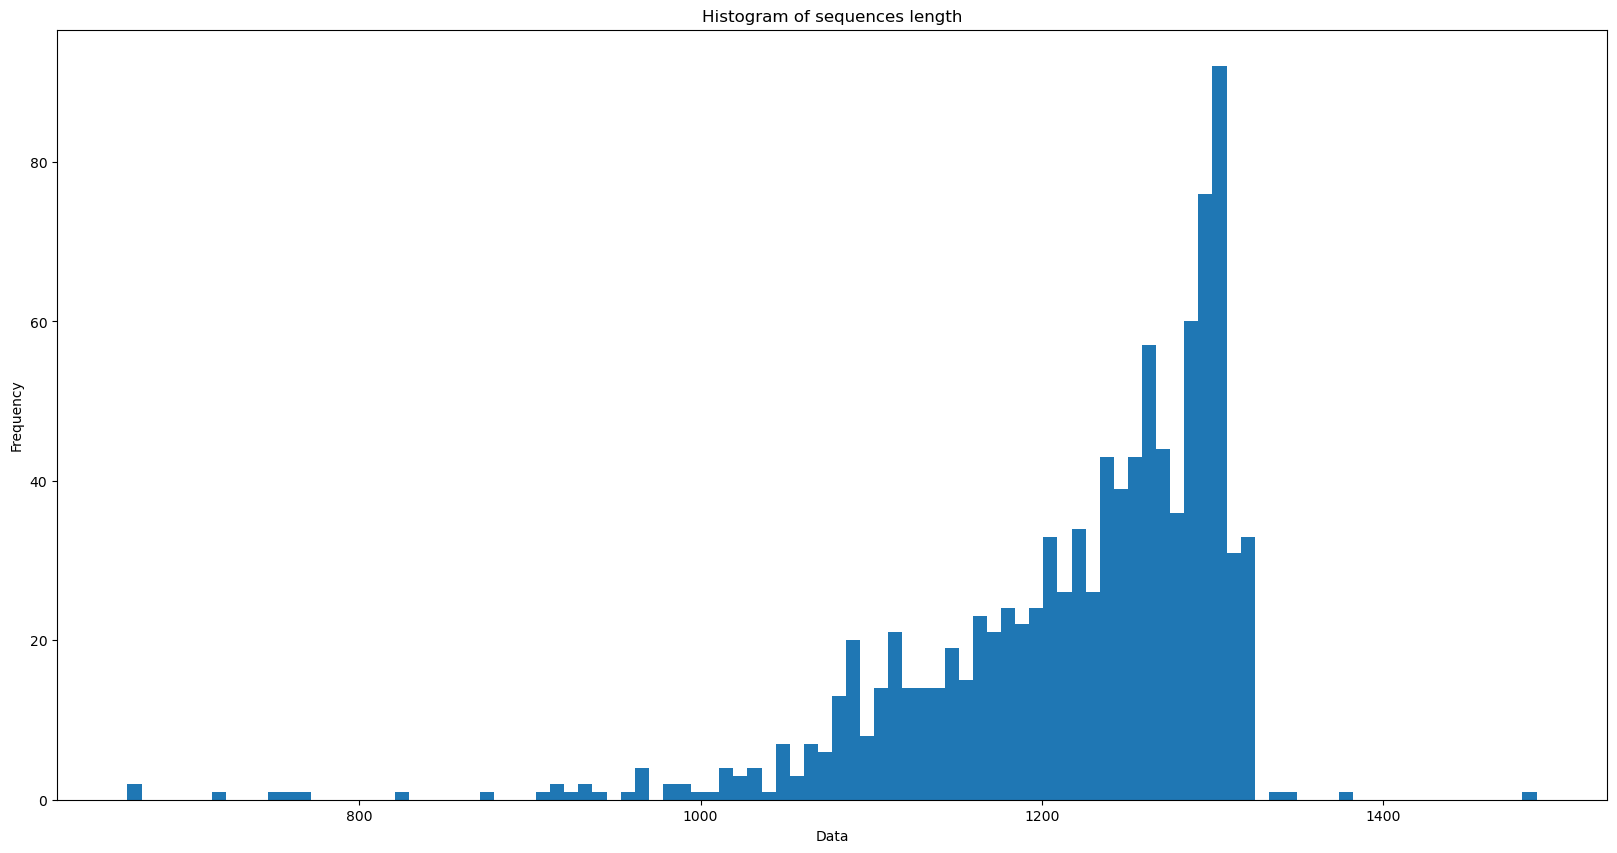

In [12]:
# Create a histogram
plt.figure(figsize=(20, 10))
plt.hist(len_sequences, bins=100)

# Add labels and title

plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of sequences length')

# Show the plot
plt.show()

## Search for specific pattern
To search for a specific pattern we have to look into the label column.

### Check labels for number of dots

In [13]:
# visualize label
df_save["label"][0]

'>CRF02_AG.KZ.2009.ALM.01.M.PI.2017'

In [14]:
# each label must have exactly 7 dots
for label in df_save["label"]:
    dots = label.count(".")
    if dots != 7:
        print(f"this label is wrong {label}")

print("All labels were checked for exactly 7 dots")

All labels were checked for exactly 7 dots


### Create labels into columns

In [15]:
# Split each label into its component parts and store them in separate lists.
subtypes = []
countries = []
years_infected = []
locations = []
id_codes = []
genders = []
risk_factors = []
years_collection = []

labels = df_save["label"]

for label in labels:
    parts = label.split('.')
    subtypes.append(parts[0][1:])
    countries.append(parts[1])
    years_infected.append(int(parts[2]))
    locations.append(parts[3])
    id_codes.append(int(parts[4]))
    genders.append(parts[5])
    risk_factors.append(parts[6])
    years_collection.append(int(parts[7]))

# Create a DataFrame from the component lists.
df_labels = pd.DataFrame({
    'subtype': subtypes,
    'gender': genders,
    'country': countries,
    'year_infected': years_infected,
    'location': locations,
    'id_code': id_codes,
    'risk_factor': risk_factors,
    'year_collection': years_collection
})

# Print the resulting DataFrame.
df_labels


,subtype,gender,country,year_infected,location,id_code,risk_factor,year_collection
0,CRF02_AG,M,KZ,2009,ALM,1,PI,2017
1,A6,M,KZ,2012,PAV,2,PI,2017
2,CRF02_AG,F,KZ,2013,JAM,3,NR,2017
3,CRF02_AG,F,KZ,2007,TUR,4,NR,2017
4,CRF02_AG,F,KZ,2008,TUR,5,NR,2017
...,...,...,...,...,...,...,...,...
999,CRF02_AG,F,KZ,2011,KAR,1000,PI,2019
1000,A6,F,KZ,2013,KAR,1001,PI,2019
1001,CRF02_AG,F,KZ,2006,ALM,1002,PI,2019
1002,CRF02_AG,F,KZ,2017,ALM,1003,NR,2019


# Explore labels

In [16]:
# unique values of columns
for key in df_labels.keys():
    print(df_labels[key].unique())

['CRF02_AG' 'A6' 'G' 'CRF07_BC' 'CRF03_AB' 'B' 'Unknown'
 'RecombinantofA1,B,C,H' 'Recombinant' 'Checkthereport'
 'HIV-1SubtypeG(02_AG)' 'CRF01_AE' 'HIV1Ogroup']
['M' 'F']
['KZ' 'RU']
[2009 2012 2013 2007 2008 2010 2015 2011 2004 2006 2002 2016 1998 2003
 2014 2005 2001 2000 2017 2019 2018]
['ALM' 'PAV' 'JAM' 'TUR' 'ZKO' 'AKM' 'KOS' 'KAR' 'SKO' 'AKT' 'KYZ' 'MAN'
 'VKO' 'ATY' 'RUS' 'VOS']
[   1    2    3 ... 1002 1003 1004]
['PI' 'NR' 'SH' 'SW' 'MSM']
[2017 2018 2019 2020]


In [17]:
# Replace location with full names
abb_loc = list(df_labels["location"].unique())
abb_loc

['ALM',
 'PAV',
 'JAM',
 'TUR',
 'ZKO',
 'AKM',
 'KOS',
 'KAR',
 'SKO',
 'AKT',
 'KYZ',
 'MAN',
 'VKO',
 'ATY',
 'RUS',
 'VOS']

In [18]:
# full names
full_loc = ["Almaty", "Pavlodar", "Zhambyl Region", "Turkestan", "West Kazakhstan Province", "Akmola Region", "Kostanay", "Karaganda",
         "North Kazakhstan Region", "Aktobe", "Kyzylorda", "Mangystay", "East Kazakhstan Province", "Atyray", "Russia", "East Kazakhstan Province"]

In [19]:
for i in range(len(abb_loc)):
    df_labels.replace(abb_loc[i], full_loc[i], inplace=True)

df_labels

,subtype,gender,country,year_infected,location,id_code,risk_factor,year_collection
0,CRF02_AG,M,KZ,2009,Almaty,1,PI,2017
1,A6,M,KZ,2012,Pavlodar,2,PI,2017
2,CRF02_AG,F,KZ,2013,Zhambyl Region,3,NR,2017
3,CRF02_AG,F,KZ,2007,Turkestan,4,NR,2017
4,CRF02_AG,F,KZ,2008,Turkestan,5,NR,2017
...,...,...,...,...,...,...,...,...
999,CRF02_AG,F,KZ,2011,Karaganda,1000,PI,2019
1000,A6,F,KZ,2013,Karaganda,1001,PI,2019
1001,CRF02_AG,F,KZ,2006,Almaty,1002,PI,2019
1002,CRF02_AG,F,KZ,2017,Almaty,1003,NR,2019


In [20]:
# save information about each patient into a different document
df_labels.to_csv("patients_1004_labels.csv", index=None)

## Example queries

In [3]:
# show for example only data related to females
df_labels[(df_labels["gender"] == "F") & (df_labels["location"] == "ALM")
         & (df_labels["year_collection"] == 2017)]

NameError: name 'df_labels' is not defined

In [22]:
# show only patients related to CRF02_AG
df_labels[df_labels['subtype'] == "CRF02_AG"]

,subtype,gender,country,year_infected,location,id_code,risk_factor,year_collection
0,CRF02_AG,M,KZ,2009,Almaty,1,PI,2017
2,CRF02_AG,F,KZ,2013,Zhambyl Region,3,NR,2017
3,CRF02_AG,F,KZ,2007,Turkestan,4,NR,2017
4,CRF02_AG,F,KZ,2008,Turkestan,5,NR,2017
7,CRF02_AG,M,KZ,2011,Kostanay,8,PI,2017
...,...,...,...,...,...,...,...,...
994,CRF02_AG,M,KZ,2011,Karaganda,995,PI,2019
995,CRF02_AG,M,KZ,2016,Karaganda,996,PI,2019
999,CRF02_AG,F,KZ,2011,Karaganda,1000,PI,2019
1001,CRF02_AG,F,KZ,2006,Almaty,1002,PI,2019


## Geomap

In [23]:
# create df with number of patients in each location
No_patients = []

for i in list(df_labels["location"].unique()):
    No_patients.append(len(df_labels[df_labels["location"] == i]))
    
df_geo = pd.DataFrame({
    "location": list(df_labels["location"].unique()),
                                        "patients": No_patients
})

df_geo

,location,patients
0,Almaty,246
1,Pavlodar,106
2,Zhambyl Region,45
3,Turkestan,106
4,West Kazakhstan Province,23
5,Akmola Region,95
6,Kostanay,45
7,Karaganda,193
8,North Kazakhstan Region,30
9,Aktobe,18


In [24]:
# create a map centered on Kazakhstan
kazakhstan_map = folium.Map(location=[47.9185, 71.3779], zoom_start=5)

# add markers for each city with the number of patients as the popup
geolocator = Nominatim(user_agent="my-application-user")

for index, row in df_geo.iterrows():
    location = geolocator.geocode(row['location'])
    if location:
        latitude = location.latitude
        longitude = location.longitude
        folium.Marker([latitude, longitude], popup=row['patients']).add_to(kazakhstan_map)

# display the map
kazakhstan_map


# Alignment

## Alignment

In [37]:
# run alignment for one variant
# phylogenetic tree should be constructed from one variant only
log_A6 = df_labels["subtype"] == "A6"
df_A6 = df_save[log_A6]

In [42]:
# Open the output FASTA file
with open('subtype_A6.fasta', 'w') as fastafile:
    # Iterate over each row in the DataFrame
    for index, row in df_A6.iterrows():
        # Extract the sequence and label from the row
        sequence = row['sequence']
        label = row['label']
        
        # Write the FASTA header and sequence to the output file
        fastafile.write('{}\n{}\n'.format(label, sequence))

In [1]:
%%bash
cd MEGA/HIV project/Data from Sanger sequencing/
./muscle5.1.linux_intel64 --align subtype_A6.fasta --output aligned.fasta


bash: line 1: /home/sultanai/MEGA/HIV: No such file or directory


CalledProcessError: Command 'b'~/MEGA/HIV project/muscle5.1.linux_intel64 --align subtype_A6.fasta --output aligned.afa\n'' returned non-zero exit status 127.

## Trimming

In [18]:
# remove spaces where only few nucleotides are presented
subtype6_sequences = list(SeqIO.parse('aligned.fasta', 'fasta'))

N = len(subtype6_sequences)
L = len(subtype6_sequences[0].seq)

list_scores = []
for index in range(L):
    
    count = 0
    for i in range(N):
        if subtype6_sequences[i].seq[index] != "-":
            count += 1
    
    list_scores.append(count)

print(N)
print(L)

In [19]:
remove_list = []
for num in list_scores:
    
    if num > N/2:
        remove_list.append(1) #stays
    else:
        remove_list.append(0) #remove
    

In [81]:
subtype6_sequences_trimmed = copy.deepcopy(subtype6_sequences)

for i in range(N):
    
    sequence = ""  
    for index, char in enumerate(subtype6_sequences[i].seq):
        
        if remove_list[index] == 1:
            sequence += char           
    
    subtype6_sequences_trimmed[i].seq = Seq.Seq(sequence)

In [82]:
# many places were trimmed
len(subtype6_sequences_trimmed[0].seq)

1284

In [83]:
with open('subtype6_sequences_trimmed.fasta', 'w') as fastafile:
    for i in range(len(subtype6_sequences_trimmed)):
        SeqIO.write(subtype6_sequences_trimmed[i], fastafile, 'fasta')